In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.fftpack import fft, ifft
from scipy.stats import t

The dataset comes from [here](https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption).  Prior to loading in pandas, I replaced all `?` entries with nulls, so pandas would properly encode the columns.

Here is a description of the columns:
1. date: Date in format dd/mm/yyyy 
2. time: time in format hh:mm:ss 
3. global_active_power: household global minute-averaged active power (in kilowatt) 
4. global_reactive_power: household global minute-averaged reactive power (in kilowatt) 
5. voltage: minute-averaged voltage (in volt) 
6. global_intensity: household global minute-averaged current intensity (in ampere) 
7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered). 
8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light. 
9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [2]:
df = pd.read_csv('./household_power_consumption.txt', sep=';')

In [3]:
df.shape

(2075259, 9)

In [4]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

It appears that rows are entirely null if null at all.  We will fill those with zeros.

In [5]:
df = df.fillna(0)
#df = df.dropna()

In [6]:
df.columns = [
    'Date',
    'Time',
    'Household active power (kW)',
    'Household reactive power (kW)',
    'Voltage (v)',
    'Household intensity (Amp)',
    'Kitchen sub-metering (W-hr)',
    'Laundry room sub-metering (W-hr)',
    'Heating & AC sub-metering (W-hr)'
]

In [7]:
df['Date'] = pd.to_datetime(
    df['Date'], infer_datetime_format=True) # Useful for grouping and ordering

In [8]:
df.head(10)

,Date,Time,Household active power (kW),Household reactive power (kW),Voltage (v),Household intensity (Amp),Kitchen sub-metering (W-hr),Laundry room sub-metering (W-hr),Heating & AC sub-metering (W-hr)
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,2006-12-16,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,2006-12-16,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,2006-12-16,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,2006-12-16,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,2006-12-16,17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


In [9]:
df.corr()

,Household active power (kW),Household reactive power (kW),Voltage (v),Household intensity (Amp),Kitchen sub-metering (W-hr),Laundry room sub-metering (W-hr),Heating & AC sub-metering (W-hr)
Household active power (kW),1.000000,0.257542,0.066527,0.998903,0.483442,0.434426,0.641816
Household reactive power (kW),0.257542,1.000000,0.107710,0.276466,0.124653,0.141190,0.099025
Voltage (v),0.066527,0.107710,1.000000,0.066114,-0.003139,0.004790,0.052826
Household intensity (Amp),0.998903,0.276466,0.066114,1.000000,0.488270,0.440139,0.629938
Kitchen sub-metering (W-hr),0.483442,0.124653,-0.003139,0.488270,1.000000,0.055201,0.103916
Laundry room sub-metering (W-hr),0.434426,0.141190,0.004790,0.440139,0.055201,1.000000,0.082681
Heating & AC sub-metering (W-hr),0.641816,0.099025,0.052826,0.629938,0.103916,0.082681,1.000000


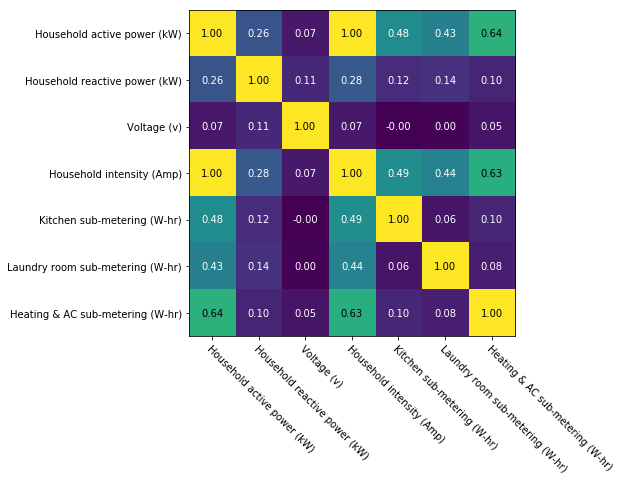

In [10]:
fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(6)
ax.imshow(df.corr())
ax.set_yticks(range(7))
ax.set_yticklabels(df.columns[2:])
ax.set_xticks(range(7))
ax.set_xticklabels(
    df.columns[2:], rotation='-45',
    ha="left", rotation_mode="anchor")
corr = df.corr().values
for i in range(7):
    for j in range(7):
        x = corr[i,j]
        ax.text(
            y=i, x=j, s='{0:2.2f}'.format(x),
            ha='center', va='center',
            color='black' if x>.5 else 'white')
#_=ax.colorbar()

In [11]:
daily_agg = df.groupby('Date').agg({
    'Household active power (kW)' : np.mean,
    'Household reactive power (kW)' : np.mean,
    'Voltage (v)' : np.mean,
    'Household intensity (Amp)' : np.mean,
    'Kitchen sub-metering (W-hr)' : np.sum, # These measure consumption per minute
    'Laundry room sub-metering (W-hr)' : np.sum,
    'Heating & AC sub-metering (W-hr)' : np.sum
})
daily_agg = daily_agg.sort_index()

In [12]:
daily_agg.shape

(1442, 7)

In [13]:
daily_agg.head()

,Household active power (kW),Household reactive power (kW),Voltage (v),Household intensity (Amp),Kitchen sub-metering (W-hr),Laundry room sub-metering (W-hr),Heating & AC sub-metering (W-hr)
Date,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.0,546.0,4926.0
2006-12-17,2.354486,0.156949,240.087028,9.999028,2033.0,4187.0,13341.0
2006-12-18,1.530435,0.112356,241.231694,6.421667,1063.0,2621.0,14018.0
2006-12-19,1.157079,0.104821,241.999313,4.926389,839.0,7602.0,6197.0
2006-12-20,1.545658,0.111804,242.308063,6.467361,0.0,2648.0,14063.0


/usr/local/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


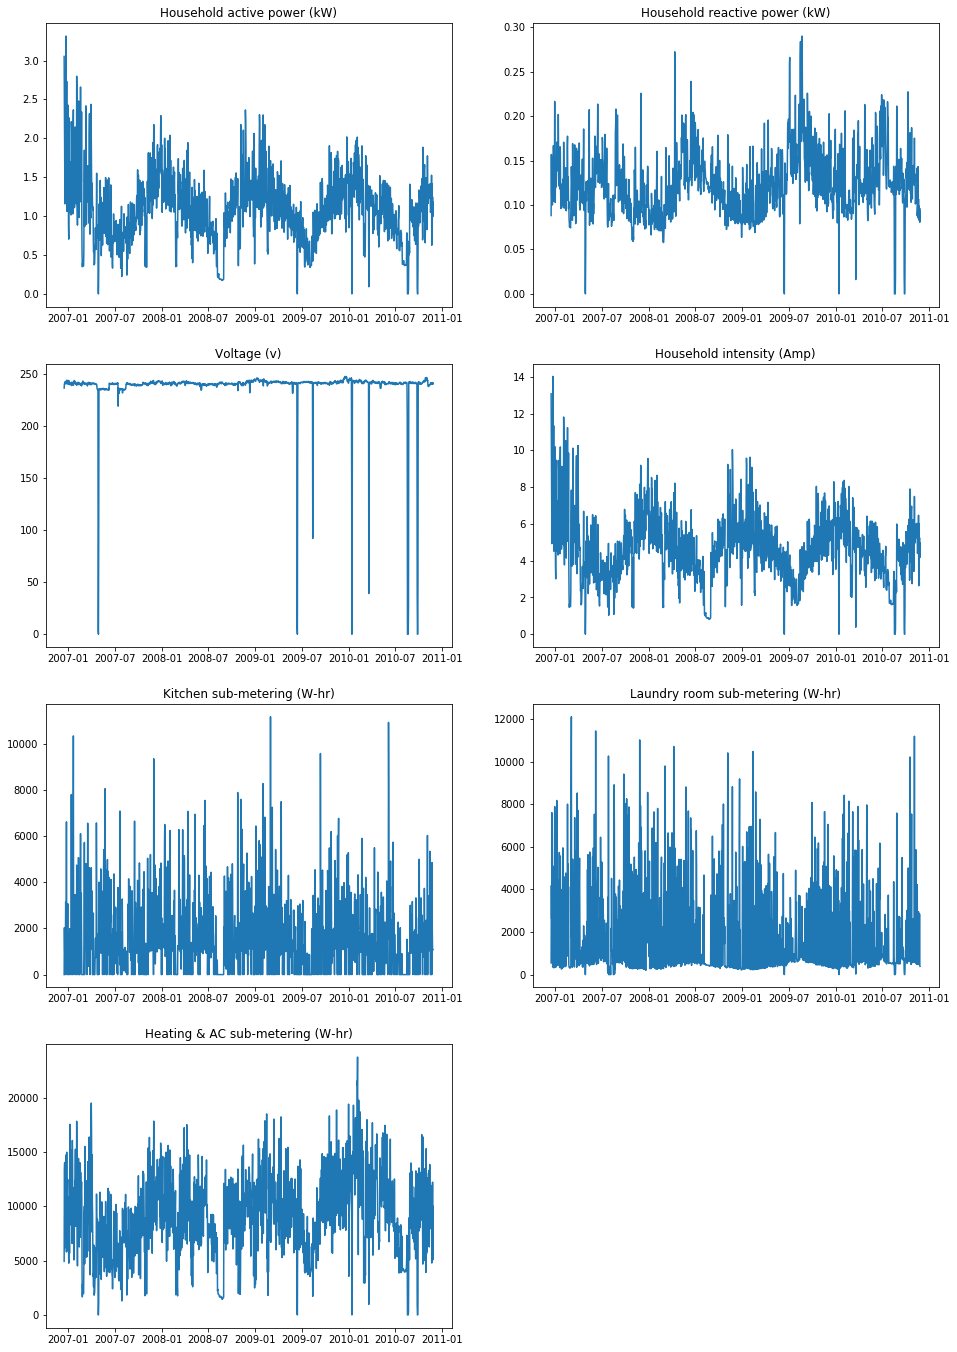

In [14]:
months = [x for x in daily_agg.index if x.day == 1 and x.month in [1,4,7,10]]
inds = [list(daily_agg.index).index(x) for x in months]
plt.figure(figsize=(16,24))
plt.tight_layout()
for i, col in enumerate(daily_agg.columns):
    plt.subplot(4,2,i+1)
    y = daily_agg[col]
    plt.plot(y)
    plt.title(col)

## Household Active Power

### Seasonality

Household active power looks like it has the nicest decomposition, so let's model that first.  We may be able to identify exogenous events using the other fields.

In [15]:
y = daily_agg[['Household active power (kW)']].copy()
y.columns = ['raw data']

Let's try averaging out the seasonality.  First we have to determine the period.  Let's try weekly and monthly rolling averages, and see what falls out.

In [16]:
y['7 day mean'] = y['raw data'].rolling(7, center=True).mean()
y['30 day mean'] = y['raw data'].rolling(30, center=True).mean()

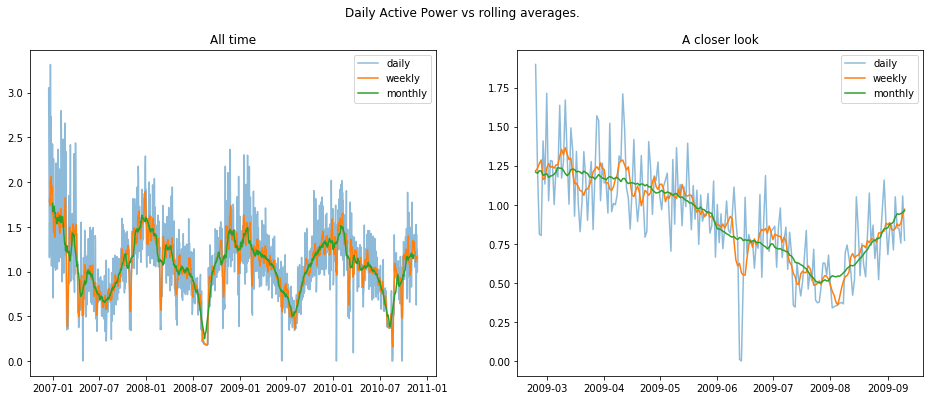

In [17]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(y['raw data'], alpha=0.5, label='daily')
plt.plot(y['7 day mean'], label='weekly')
plt.plot(y['30 day mean'], label='monthly')
plt.title('All time')
plt.legend()
plt.subplot(1,2,2)
plt.plot(y['raw data'].iloc[800:1000], alpha=0.5, label='daily')
plt.plot(y['7 day mean'].iloc[800:1000], label='weekly')
plt.plot(y['30 day mean'].iloc[800:1000], label='monthly')
plt.title('A closer look')
plt.legend()
_=plt.suptitle('Daily Active Power vs rolling averages.')

The monthly rolling average is definitely a better approximation of the trend, and illustrates the yearly trend in power consumption.

In [18]:
y['seasonally adjusted'] = y['raw data'] / y['30 day mean']

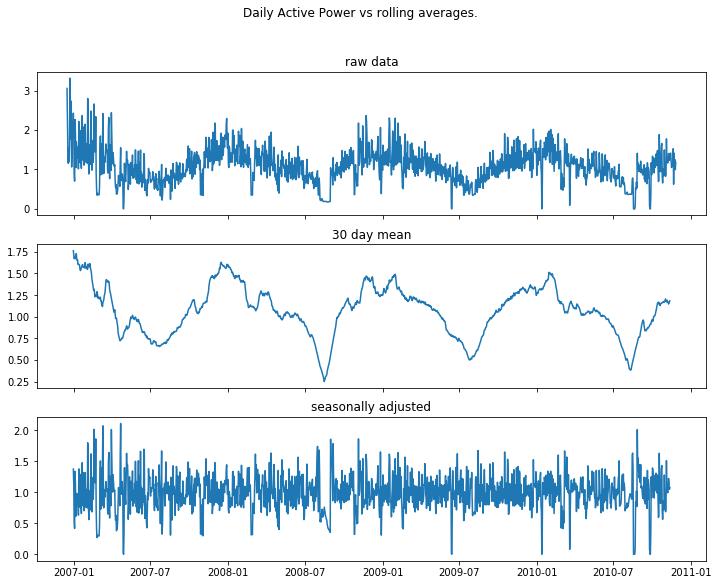

In [19]:
fig, axs = plt.subplots(
    ncols=1, nrows=3, sharex=True,figsize=(12,9))
for i, col in enumerate(['raw data', '30 day mean', 'seasonally adjusted']):
    axs[i].plot(y[col])
    axs[i].set_title(col)
_=fig.suptitle('Daily Active Power vs rolling averages.')

In [20]:
se = y.loc['2007-01-03':'2010-11-09', 'seasonally adjusted']

In [21]:
months = [x for x in se.index if x.day==1] # This will miss the head and tail of the series.  Must adjust for that.
weeks = [x for x in se.index if x.weekday() == 0]

This next plot shows that there is not a strong monthly or weekly seasonal pattern.  We can just leave that out, I guess?

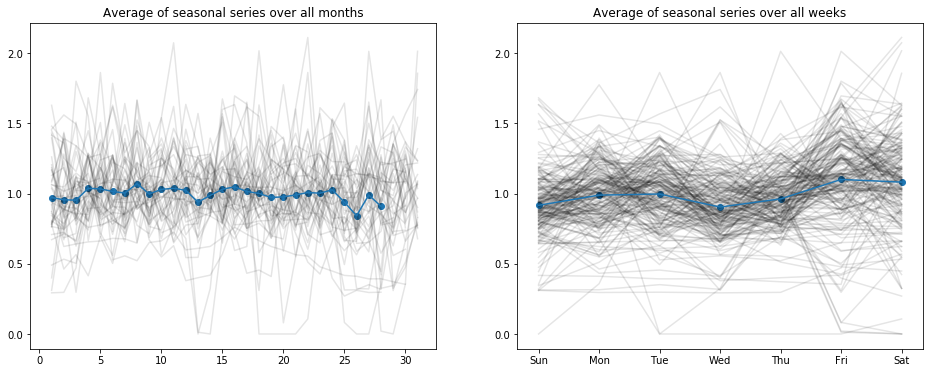

In [22]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
num_months = 0
xs = range(1,29)
ys = np.zeros(28) # Use 28 days from the start  of each month to see monthly pattern for all months
for i in range(1,len(months)):
    start = months[i-1]
    end = months[i] - timedelta(days=1)
    w = se[start:end].values
    ys += w[:28]
    num_months += 1
    plt.plot(range(1, len(w)+1), w, c='black', alpha=0.1)
ys /= num_months
plt.plot(xs, ys)
plt.scatter(xs, ys)
_=plt.title('Average of seasonal series over all months')
plt.subplot(1,2,2)
num_weeks = 0
xs = range(7)
ys = np.zeros(7)
for i in range(1,len(weeks)):
    start = weeks[i-1]
    end = weeks[i] - timedelta(days=1)
    w = se[start:end].values
    if not all([x == x for x in w]):
        print('Ooops')
        break
    ys += w
    num_weeks += 1
    plt.plot(range(len(w)), w, c='black', alpha=0.1)
ys /= num_weeks
plt.plot(xs, ys)
plt.scatter(xs, ys)
plt.xticks(range(7), ['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
_=plt.title('Average of seasonal series over all weeks')

In [23]:
w = np.ones((1,28))
ys = np.zeros((1,31))

In [24]:
xs = range(1,32)
month_ys = np.zeros((1,31))
for i in range(1,len(months)):
    start = months[i-1]
    end = months[i] - timedelta(days=1)
    y = se[start:end].values.reshape(1,-1)
    month_ys = np.concatenate((
        month_ys,
        np.pad(y, pad_width=((0,0),(0,31-y.shape[1])), mode='constant', constant_values=np.nan)
    ), axis=0)

month_df0 = pd.DataFrame(month_ys).describe().loc[['count', 'mean', 'std']].T
month_df0['t'] = month_df0['count'].apply(lambda x : t.ppf(1-0.025, x-1))
month_df0['upper'] = month_df0['mean'] + (month_df0['t'] * month_df0['std']) / month_df0['count']
month_df0['lower'] = month_df0['mean'] - (month_df0['t'] * month_df0['std']) / month_df0['count']

In [25]:
xs = range(7)
week_ys = np.zeros((1,7))
for i in range(1,len(weeks)):
    start = weeks[i-1]
    end = weeks[i] - timedelta(days=1)
    y = se[start:end].values.reshape(1,-1)
    week_ys = np.concatenate((week_ys, y), axis=0)

week_df0 = pd.DataFrame(week_ys).describe().loc[['count', 'mean', 'std']].T
week_df0['t'] = week_df0['count'].apply(lambda x : t.ppf(1-0.025, x-1))
week_df0['upper'] = week_df0['mean'] + (week_df0['t'] * week_df0['std']) / week_df0['count']
week_df0['lower'] = week_df0['mean'] - (week_df0['t'] * week_df0['std']) / week_df0['count']

In [ ]:
plt.figure(figsize=(16,6))
for j, k, arr, df0 in zip(range(1,3), [31,7], [month_ys,week_ys], [month_df0, week_df0]):
    plt.subplot(1,2,j)
    for i in range(arr.shape[0]):
        plt.scatter(range(k), arr[i], c='black', alpha=0.1)
        plt.plot(range(k), df0['mean'], c='darkblue')
        #plt.scatter(range(k), df0['mean'], c='darkblue')
        plt.fill_between(range(k), df0['upper'], df0['lower'])
        _=plt.title(('Monthly' if j==1 else 'Weekly')+' Seasonality')

These bands look suspiciously narrow.

### Choosing an ARIMA model